## Implementation of Linear Regression

Tổng quát: **Linear Regression (Hồi quy tuyến tính)** là một thuật toán **học có giám sát**, được áp dụng chủ yếu trong các bài toán về hồi quy (**Regresison**) bằng việc tạo ra một hàm số toán học tuyến tính giữa các tính chất (**feature**) của một record với giá trị cần dự đoán. Ví dụ: Dự đoán giá nhà như một hàm số tuyến tính của các đặc điểm của ngôi nhà (số phòng ngủ, khoảng cách với trung tâm, ... )

Bài toán: Giả sử ta có tập hợp các ngôi nhà được đại diện bằng một ma trận **X** có kích thước **MxN** với **M** là số lượng ngôi nhà đã được khảo sát và N là số lượng feature và một vector **y** chứa mức giá của căn nhà tương ứng. Nhiệm vụ là hãy dự đoán giá nhà của một ngôi nhà với feature vecto **z** có kích thước **1xN** với một hàm toán tuyến tính có dạng

$$
    Price = w_1*z_1 + w_2*z_2 + ... + w_n*z_n + b 
$$

--> Để giải bài toán này, ta có thể sử dụng toán học để có thể tính toán chính xác các giá trị w. Tuy nhiên, theo cách của **Machine Learning**, ta cần phát triển các thành phần sau của thuật toán: 
- **Hàm mất mát (Loss Function)** có mục tiêu xác định chính xác sai số giữa giá trị thực và giá trị dự đoán
- **Cực tiểu hóa** hàm mất mát
- Thực hiện **update** các giá trị trọng số cho quan sát dựa trên **thuật toán cực tiểu hóa hàm mất mát** *(Gradient Descent, Evolutionary Algorithms,...)*   

In [2]:
# import necessary libraries for implementation
import numpy as np

In [23]:
def predict(w : np.ndarray, X : np.ndarray) -> np.ndarray:
    """
    Function: Calculate the predicted y on a linear function

    Args:
        w (np.ndarray) : Coefficients or weights attached to each feature
        X (np.ndarray) : Vector/Matrix of independent features of a dataset

    Returns:
        np.ndarray : The predicted value of records
    """
    try:
        return np.matmul(X, w)
    except:
        print("The shape of your matrix and your weight vector are not compatible!")

### Loss Function

Mean Squared Error

$$
    MSE = \frac {1}{n} * \sum_{i=1}^n (y_i - \hat y_i)^2
$$
Theo đó, ,mất mát sẽ là **bình phương sai số** giữa giá trị thực và giá trị dự đoán 

In [4]:
def meanSquaredError(yTrue : np.ndarray, yPred : np.array) -> np.array :
    numberOfSamples = yTrue.shape[0]
    return np.sum((yPred - yTrue)**2) / numberOfSamples

### Gradient Descent (Algorithms)

In [5]:
def weightGradient(yTrue : np.ndarray, yPred : np.ndarray, X : np.ndarray) -> np.ndarray:
    numberOfSamples = X.shape[0]
    return 2*X.T.dot(yPred - yTrue)/numberOfSamples

In [34]:
def updateWeight(w : np.ndarray, weightGradients : np.ndarray, learningRate : np.float16) -> np.ndarray:
    return w - learningRate*weightGradients

### Examine in the real context

#### Linear Regression with Batch Gradient Descent

**Batch GD** là một loại của GD với tính chất là sử dụng **toàn bộ** dữ liệu training và update bình quân thay đổi trọng số trong mỗi **epoch** - điểm khác biệt với **Stochastic GD**, chỉ sử dụng **một record** để update cho đến khi hết tập dữ liệu trong một **epoch**

In [44]:
# Initialize the data X and y
X = np.array([[3, 4, 5, 6]])
y = np.array([[60, 55, 66, 93]])

# Reshape the X and y values into more appropriate shape
X = X.reshape((-1,1))
y = y.reshape((-1,1))

#Append another column of one representing intercepts in the computation
X = np.concatenate((X, np.ones(X.shape)), axis=1)   # X = [OldX 1]

# Initialize the parameters for the model
w = np.random.random((2, 1))
numberOfEpochs = 50
learningRate = 0.005
LOSSES = []

#Training process
for epoch in range(numberOfEpochs):

    y_pred = predict(w, X)  # Predict the value for each record in X

    loss = meanSquaredError(y, y_pred)
    LOSSES.append(loss)     # Store the loss into an array

    weightChange =  weightGradient(y, y_pred, X)    # Compute the change in the weight to minimize the loss function
    w = updateWeight(w, weightChange, learningRate) # Update the change to the weight vector


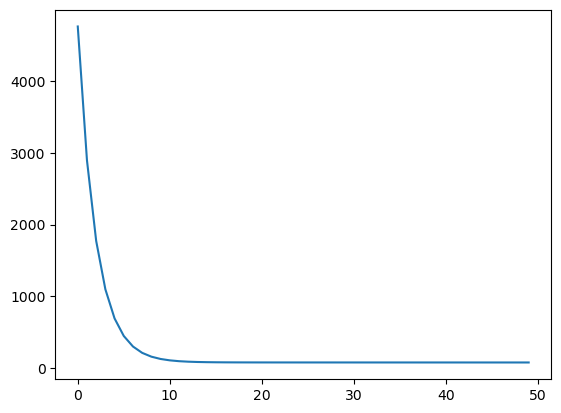

In [45]:
import matplotlib.pyplot as plt
plt.plot(range(numberOfEpochs), LOSSES)
plt.show()